Required Libraries  
Install using requirements.txt

In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_log_error as msle
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
from collections import OrderedDict

In [67]:
# read the dataset. File location needs to be changed accordingly
df = pd.read_csv("./dataset.csv")

# Exploratory Data Analysis (EDA)  
<ol>
    <li>Graphs showing revenue, budget, runtime variations over the years</li>
    <li>Figures comparing Revenue with budget, popularity and runtime</li>
    <li>Catplots</li>
    <li>Scatter plots</li>
    <li>Linear Regression Model</li>
    <li>Sample Submission</li>
</ol>

## Section 1 : Graphs showing revenue, budget, runtime variations over the years

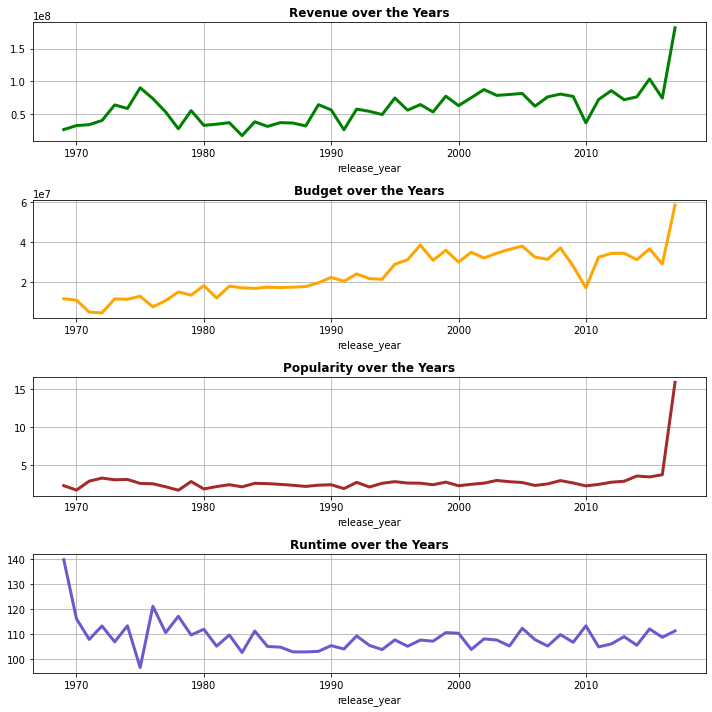

In [68]:
fig, ax = plt.subplots(4, 1, tight_layout=True)
plt.grid()

df.groupby('release_year')['revenue'].mean().plot(ax=ax[0], figsize=(10, 10), linewidth=3, color='green').set_title('Revenue over the Years', fontweight="bold")
ax[0].grid()

df.groupby('release_year')['budget'].mean().plot(ax=ax[1], figsize=(10, 10), linewidth=3, color='orange').set_title('Budget over the Years', fontweight="bold")
ax[1].grid()

df.groupby('release_year')['popularity'].mean().plot(ax=ax[2], figsize=(10, 10), linewidth=3, color='brown').set_title('Popularity over the Years', fontweight="bold")
ax[2].grid()

df.groupby('release_year')['runtime'].mean().plot(ax=ax[3], figsize=(10, 10), linewidth=3, color='slateblue').set_title('Runtime over the Years', fontweight="bold")
ax[3].grid()

fig.tight_layout(pad=2.0)
plt.show()


## Section 2 : Figures comparing Revenue with budget, popularity and runtime

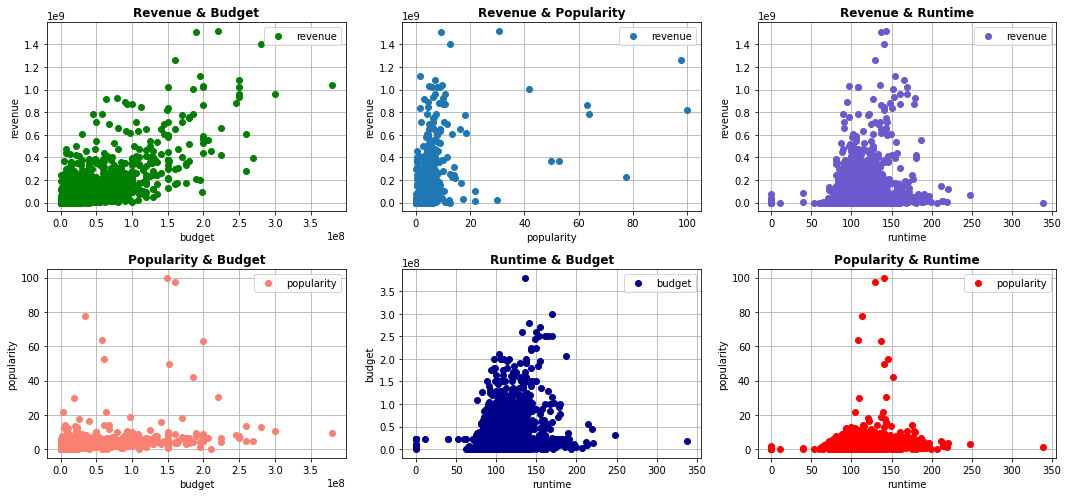

In [69]:
fig, ax = plt.subplots(2, 3, figsize=(15, 7), tight_layout=True)

df.plot(ax=ax[0][0], x='budget', y='revenue', style='o', ylabel= 'revenue', color='green').set_title('Revenue & Budget', fontweight="bold")
ax[0][0].grid()

df.plot(ax=ax[0][1], x='popularity', y='revenue', style='o', ylabel= 'revenue').set_title('Revenue & Popularity', fontweight="bold")
ax[0][1].grid()

df.plot(ax=ax[0][2], x='runtime', y='revenue', style='o', ylabel= 'revenue', color='slateblue').set_title('Revenue & Runtime', fontweight="bold")
ax[0][2].grid()

df.plot(ax=ax[1][0], x='budget', y='popularity', style='o', ylabel= 'popularity', color='salmon').set_title('Popularity & Budget', fontweight="bold")
ax[1][0].grid()

df.plot(ax=ax[1][1], x='runtime', y='budget', style='o', ylabel= 'budget', color='DarkBlue').set_title('Runtime & Budget', fontweight="bold")
ax[1][1].grid()

df.plot(ax=ax[1][2], x='runtime', y='popularity', style='o', ylabel= 'popularity', color='red').set_title('Popularity & Runtime', fontweight="bold")
ax[1][2].grid()

fig.tight_layout(pad=4.0)
plt.show()

Splitting dataset for training and testing

In [70]:
x = df[['budget', 'genres', 'popularity', 'production_companies', 'runtime', 'spoken_languages', 'cast']]
y = df['revenue']
for index, row in df.iterrows():
    try:
        x.at[index, 'genres'] = len((row['genres']))
    except:
        x.at[index, 'genres'] = 0
    try:
        x.at[index, 'production_companies'] = len((row['production_companies']))
    except:
        x.at[index, 'production_companies'] = 0
    try:
        x.at[index, 'spoken_languages'] = len((row['spoken_languages']))
    except:
        x.at[index, 'spoken_languages'] = 0
    try:
        x.at[index, 'cast'] = len((row['cast']))
    except:
        x.at[index, 'cast'] =  0

##### Correlation Matrix

<AxesSubplot:>

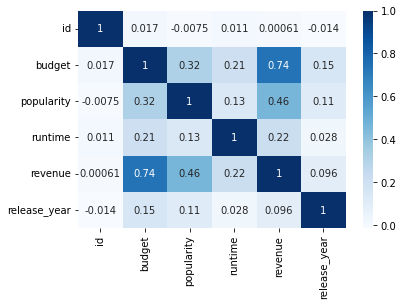

In [71]:
sns.heatmap(df.corr(), cmap='Blues', annot=True)

<AxesSubplot:xlabel='budget', ylabel='revenue'>

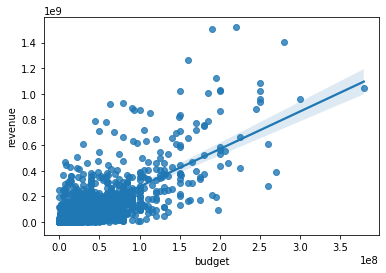

In [72]:
sns.regplot(x="budget", y="revenue", data=df)

## Section 3 : Catplots
#### Plots
<ol>
    <li>Revenue for film with and without collection</li>
    <li>Revenue for films based on number of genres</li>
    <li>Revenue for films based on numberof production companies</li>
    <li>Revenue for films based on number of production countries</li>
</ol>

#### Resources
<ol>
    <li><a href = "https://www.delftstack.com/howto/seaborn/catplot-seaborn-python/"> Catplot in Seaborn</a></li>
</ol>


Text(0.5, 1.0, 'Revenue for film with and without collection')

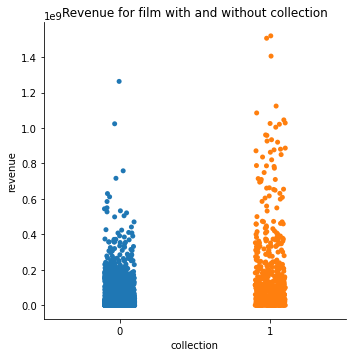

In [73]:
data = df.copy()
data['collection'] = 0
data.loc[data['belongs_to_collection'].isnull() == False, 'collection'] = 1

sns.catplot(x='collection', y='revenue', data=data)
plt.title('Revenue for film with and without collection')

Text(0.5, 1.0, 'Revenue for films based on number of genres')

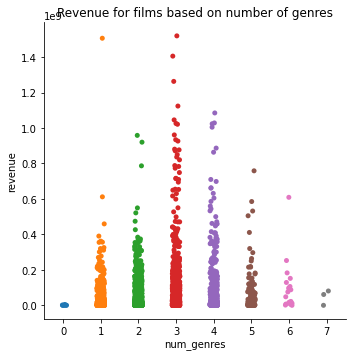

In [74]:
genres_count=[]
for i in data['genres']:
    if(not(pd.isnull(i))):
        
        genres_count.append(len(eval(i)))
        
    else:
        genres_count.append(0)
data['num_genres'] = genres_count

sns.catplot(x='num_genres', y='revenue', data=data)
plt.title('Revenue for films based on number of genres')

Text(0.5, 1.0, 'Revenue for films based on numberof production companies')

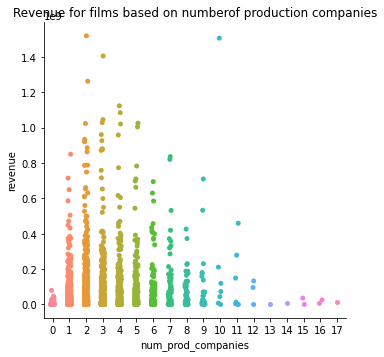

In [75]:
prod_comp_count=[]
for i in data['production_companies']:
    if(not(pd.isnull(i))):
        
        prod_comp_count.append(len(eval(i)))
        
    else:
        prod_comp_count.append(0)
data['num_prod_companies'] = prod_comp_count

sns.catplot(x='num_prod_companies', y='revenue', data=data)
plt.title('Revenue for films based on numberof production companies')

Text(0.5, 1.0, 'Revenue for films based on number of production countries')

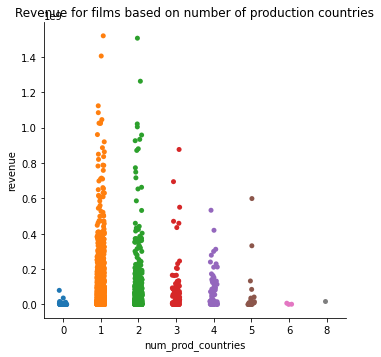

In [76]:
prod_coun_count=[]
for i in data['production_countries']:
    if(not(pd.isnull(i))):
        
        prod_coun_count.append(len(eval(i)))
        
    else:
        prod_coun_count.append(0)
data['num_prod_countries'] = prod_coun_count

sns.catplot(x='num_prod_countries', y='revenue', data=data)
plt.title('Revenue for films based on number of production countries')

##### Top genres based on Revenue

In [77]:
genres = {}
for i in data['genres']:
    if(not(pd.isnull(i))):
        if (eval(i)[0]['name']) not in genres:
            genres[eval(i)[0]['name']]=1
        else:
                genres[eval(i)[0]['name']]+=1
                
plt.figure(figsize = (12, 8))
# wordcloud = WordCloud(background_color="white",width=1000,height=1000, max_words=10,relative_scaling=0.5,normalize_plurals=False).generate_from_frequencies(genres)

# plt.imshow(wordcloud)
# plt.title('Top genres')
# plt.axis("off")
# plt.show()
genres = OrderedDict(genres)
OrderedDict(sorted(genres.items(), key=lambda t: t[1]))

OrderedDict([('TV Movie', 1),
             ('Foreign', 2),
             ('Western', 13),
             ('History', 16),
             ('War', 20),
             ('Music', 20),
             ('Mystery', 33),
             ('Family', 36),
             ('Science Fiction', 41),
             ('Romance', 67),
             ('Fantasy', 68),
             ('Documentary', 71),
             ('Animation', 76),
             ('Thriller', 116),
             ('Crime', 147),
             ('Horror', 170),
             ('Adventure', 187),
             ('Action', 520),
             ('Comedy', 604),
             ('Drama', 785)])

<Figure size 864x576 with 0 Axes>

## Section 4 : Sctter Plots
#### Plots
<ol>
    <li>Number of Cast vs Revenue</li>
    <li>Number of Crew members vs Revenue</li>
</ol>

#### Resources
<ol>
    <li><a href = "https://chartio.com/learn/charts/what-is-a-scatter-plot/">Scatter plots</a></li>
</ol>

Text(0.5, 1.0, 'Number of cast members vs revenue')

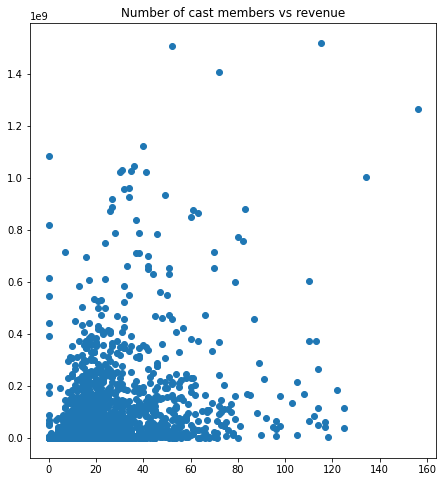

In [78]:
total_cast=[]
for i in data['cast']:
    if(not(pd.isnull(i))):
        
        total_cast.append(len(eval(i)))
        
    else:
        total_cast.append(0)
data['cast_count'] = total_cast

plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plt.scatter(data['cast_count'], data['revenue'])
plt.title('Number of cast members vs revenue')

Text(0.5, 1.0, 'Number of crew members vs revenue')

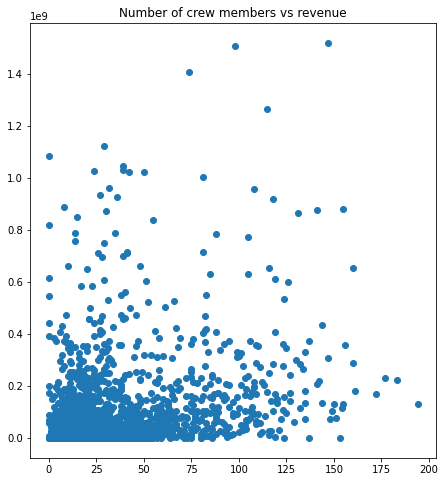

In [79]:
total_crew=[]
for i in data['crew']:
    if(not(pd.isnull(i))):
        
        total_crew.append(len(eval(i)))
        
    else:
        total_crew.append(0)
data['crew_count'] = total_crew

plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plt.scatter(data['crew_count'], data['revenue'])
plt.title('Number of crew members vs revenue')

##### Box Plot
<a href = "https://towardsdatascience.com/understanding-boxplots-5e2df7bcbd51">What is a box plot?</a>

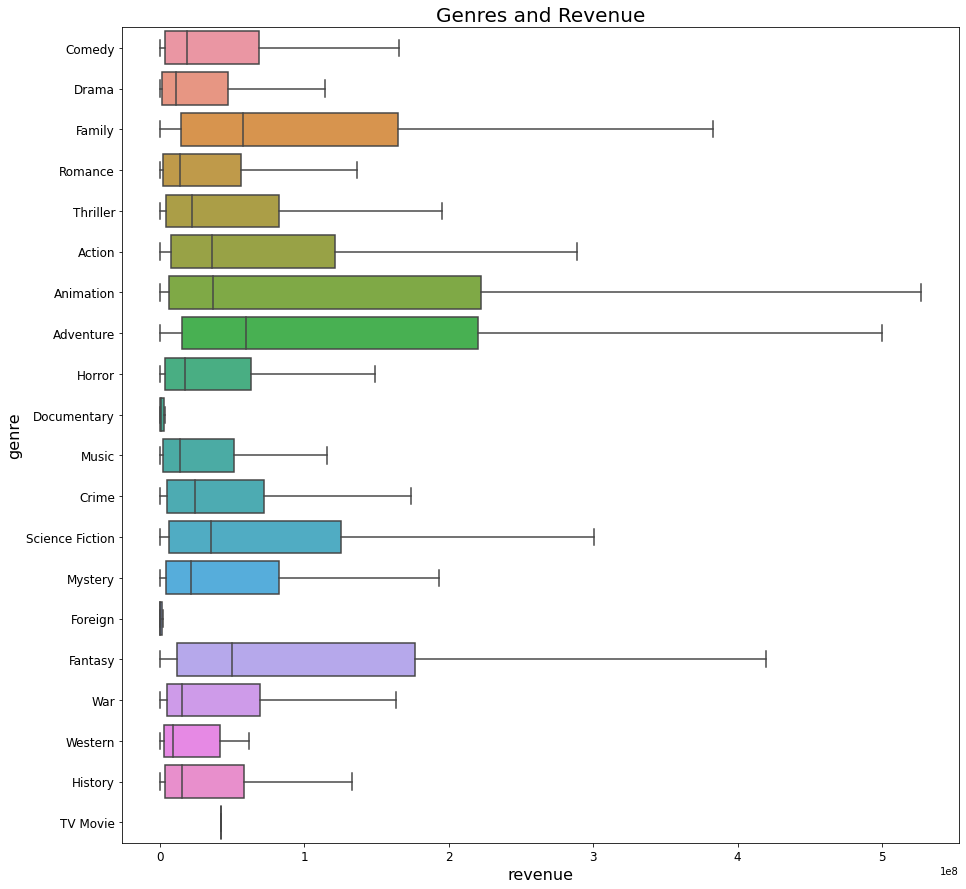

In [80]:
genres = []
repeated_revenues = []
for i in range(len(data)):
  if data['genres'][i] == data['genres'][i]:
      movie_genre = [genre['name'] for genre in eval(data['genres'][i])]
      genres.extend(movie_genre)
      repeated_revenues.extend([data['revenue'][i]]*len(movie_genre))
  
genre = pd.DataFrame(np.zeros((len(genres), 2)))
genre.columns = ['genre', 'revenue']
genre['genre'] = genres
genre['revenue'] = repeated_revenues

fig, ax = plt.subplots(figsize=(15, 15))
ax.tick_params(axis='both', labelsize=12)
plt.title('Genres and Revenue', fontsize=20)
plt.xlabel('revenue', fontsize=16)
plt.ylabel('genre', fontsize=16)
sns.boxplot(ax=ax, x=repeated_revenues, y=genres, showfliers=False, orient='h')
plt.show()

## Section 5 : Linear Regression

In [83]:
# Drop Columns that are not needed and split the columns.
# create a new column for day of the week. Monday = 0, Sunday = 6
weeks = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
def change_to_text(x):
    return weeks.index(x)
data['day'] = data['release_day_of_the_week'].apply(lambda x : change_to_text(x))

Train the model on the Training dataset ad test it on the testing dataset

In [108]:
# split as training and testing data. 80 - 20 ratio is common
test_data_size = 0.2

y = data[['movie_id', 'revenue']]
x_train, x_test, y_train, y_test = train_test_split(data, y, test_size = test_data_size)

submission = x_test.copy()
submission.drop(columns= ['collection', 'num_genres', 'num_prod_companies', 'num_prod_countries', 'cast_count', 'crew_count', 'day', 'movie_id'], axis = 1, inplace = True)
x_train.drop(columns= ['id', 'belongs_to_collection', 'revenue', 'genres', 'language', 'title', 'overview', 'production_companies', 'release_day_of_the_week', 'production_countries','spoken_languages', 'status', 'tagline', 'Keywords', 'cast', 'crew','release_year','release_date'], axis = 1, inplace = True)
x_test.drop(columns= ['id', 'belongs_to_collection', 'revenue', 'genres', 'language', 'title', 'overview', 'production_companies', 'release_day_of_the_week', 'production_countries','spoken_languages', 'status', 'tagline', 'Keywords', 'cast', 'crew','release_year','release_date'], axis = 1, inplace = True)

# Train the model
LR = LinearRegression()
LR.fit(x_train, y_train['revenue'])
y_prediction =  LR.predict(x_test)

# Accuracy
def rmsle(y,y0): 
    return np.sqrt(np.mean(np.square(np.log1p(y)-np.log1p(y0))))

# root mean square log error
rmsle = rmsle(y_prediction, y_test['revenue'])
print(rmsle)

# Mean Square Error
print(sum(y_prediction - y_test['revenue']) / (test_data_size * len(y_test)))

2.6722373779832
40646938.304134496


/tmp/ipykernel_67110/1897990179.py:19: RuntimeWarning: invalid value encountered in log1p
  return np.sqrt(np.mean(np.square(np.log1p(y)-np.log1p(y0))))


## Section 6 : Sample Submission

In [109]:
submission['predicted_revenue'] = y_prediction
submission.to_csv('sample_submission.csv', index = False)